# Start of program

In [23]:
from functions import *
#from get_field import *
import numpy as np
import matplotlib.pyplot as plt

Input:

In [55]:
# Code should run for how many loops:
run_time = 4
# Between how many ped should be added per timestamp
ped_add_min = 1
ped_add_max = 10


In [56]:
ped_list = []
plotting_list = []

In [57]:
for t in range(0, run_time):
    ped_list = generate_ped(ped_list, ped_add_min, ped_add_max)
    plotting_list.append(ped_list)
    field_list = get_field(ped_list)
    for ped in range(0, len(ped_list)):
        probabilities = get_prob(ped_list, ped, field_list)
        decided_square = make_decision(probabilities)
        move_ped(ped_list, ped, decided_square)

        

In [58]:
plotting_list

[[[[8, 72], [14, 2]],
  [[9, 128], [15, 3]],
  [[10, 91], [10, 4]],
  [[7, 62], [7, 2]],
  [[17, 4], [12, 4]],
  [[17, 13], [14, 1]],
  [[11, 35], [5, 1]],
  [[0, 143], [8, 1]],
  [[16, 96], [14, 2]],
  [[17, 149], [10, 4]],
  [[20, 104], [11, 1]],
  [[14, 103], [11, 2]],
  [[18, 23], [10, 0]],
  [[4, 45], [11, 1]],
  [[20, 31], [10, 2]],
  [[16, 34], [5, 0]],
  [[17, 110], [13, 3]],
  [[10, 107], [9, 3]],
  [[10, 76], [4, 1]],
  [[14, 137], [5, 3]],
  [[15, 67], [12, 2]],
  [[4, 99], [12, 1]],
  [[9, 119], [12, 2]],
  [[19, 89], [16, 3]]],
 [[[8, 72], [14, 2]],
  [[9, 128], [15, 3]],
  [[10, 91], [10, 4]],
  [[7, 62], [7, 2]],
  [[17, 4], [12, 4]],
  [[17, 13], [14, 1]],
  [[11, 35], [5, 1]],
  [[0, 143], [8, 1]],
  [[16, 96], [14, 2]],
  [[17, 149], [10, 4]],
  [[20, 104], [11, 1]],
  [[14, 103], [11, 2]],
  [[18, 23], [10, 0]],
  [[4, 45], [11, 1]],
  [[20, 31], [10, 2]],
  [[16, 34], [5, 0]],
  [[17, 110], [13, 3]],
  [[10, 107], [9, 3]],
  [[10, 76], [4, 1]],
  [[14, 137], [5, 3]]

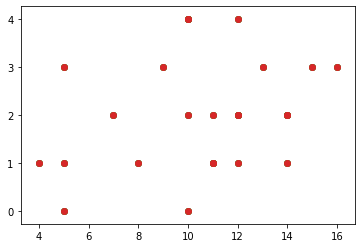

In [61]:
for ped_l in plotting_list:
    array = np.array(ped_l)
    plt.scatter(x=array[:,1,0], y=array[:,1,1])

In [43]:
ped_list[1][0]

[18, 79]